In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error


Extracting the Data

The stock data of HDFC Bank Ltd. was obtained using the yfinance module, covering the time period from 2019 to 2023.

In [ ]:
start_date = '2019-04-01'
end_date = '2023-03-31'
ticker = 'HDFCBANK.NS'
df = yf.download(ticker, start= start_date, end=end_date)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,1162.625000,1166.000,1152.300049,1155.900024,1115.361816,4823538
2019-04-02,1160.000000,1160.000,1142.724976,1147.425049,1107.183960,5455248
2019-04-03,1146.050049,1158.000,1144.125000,1146.375000,1106.170776,3829726
2019-04-04,1146.375000,1156.500,1140.000000,1141.974976,1101.925171,4605776
2019-04-05,1143.900024,1156.875,1141.000000,1152.800049,1112.370605,4175590


DATA EXPLORATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 991 entries, 2019-04-01 to 2023-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       991 non-null    float64
 1   High       991 non-null    float64
 2   Low        991 non-null    float64
 3   Close      991 non-null    float64
 4   Adj Close  991 non-null    float64
 5   Volume     991 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 54.2 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,991.000000,991.000000,991.000000,991.000000,991.000000,9.910000e+02
mean,1350.302724,1363.824367,1335.263751,1349.657721,1319.365849,9.292902e+06
std,203.944536,204.014679,205.264397,204.797088,205.186037,6.123991e+06
min,770.450012,810.000000,738.750000,767.700012,747.039307,5.484040e+05
25%,1205.512512,1215.350037,1192.087524,1203.212524,1167.121155,5.392006e+06
50%,1395.150024,1408.750000,1378.599976,1394.849976,1365.874268,7.374047e+06
75%,1509.974976,1523.674988,1497.025024,1511.924988,1480.265991,1.089627e+07
max,1705.000000,1725.000000,1675.000000,1695.500000,1676.276611,5.406435e+07


Exploratory Data Analysis

In [ ]:
# Average, Median, STd, max and min of Closing Price.
print("Mean closing price: ", df['Close'].mean())
print("Median closing price: ", df['Close'].median())
print("Standard deviation of closing price: ", df['Close'].std())
print("Maximum value of closing price: ", df['Close'].max())
print("Minimum value of closing price: ", df['Close'].min())


Mean closing price:  1349.6577213106434
Median closing price:  1394.8499755859375
Standard deviation of closing price:  204.79708800866987
Maximum value of closing price:  1695.5
Minimum value of closing price:  767.7000122070312


High standard deviation and large difference between the max and min values indicate high volitality in the stock price.

In [ ]:
# Percent Return of Closing Price
returns = df['Close'].pct_change()
returns.head()

Date
2019-04-01         NaN
2019-04-02   -0.007332
2019-04-03   -0.000915
2019-04-04   -0.003838
2019-04-05    0.009479
Name: Close, dtype: float64

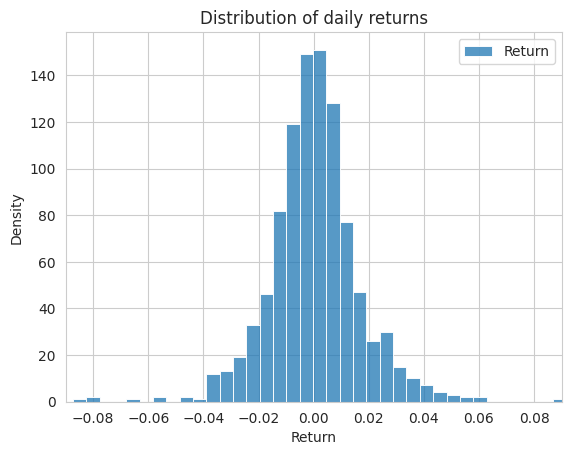

In [ ]:
sns.histplot(returns[1:], bins=50, label='Return')
plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Distribution of daily returns')
plt.legend()
plt.gca().set_xlim(-0.09, 0.09)
plt.show()

Most of the distribution of daily returns of HDFC Bank stock is between -0.04 and 0.06 indicates that the stock's daily returns are relatively stable and do not experince large fluntions. A high concentration of narrow range indicates that stock price chage relativiely little from day to day.

In [ ]:
# Date with Lowest and Highest Returns
print(returns.idxmin())
print(returns.idxmax())


2020-03-23 00:00:00
2020-03-25 00:00:00


In [ ]:
Chart = df[['Open', "High", "Low", "Close"]].loc['2019-04-01 00:05:30' : '2023-03-31 00:05:30']
Chart.iplot(kind='candle')



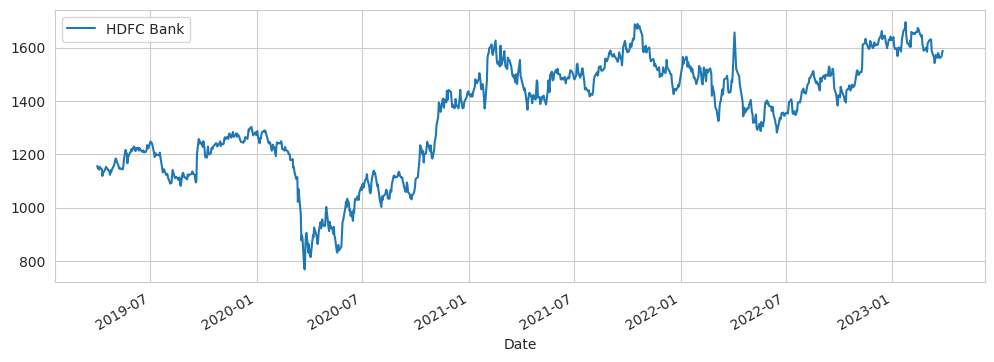

In [ ]:
Closed_price = df['Close']
Closed_price.plot(label="HDFC Bank", figsize=(12,4))
plt.legend()

In [ ]:
Closed_price.iplot()

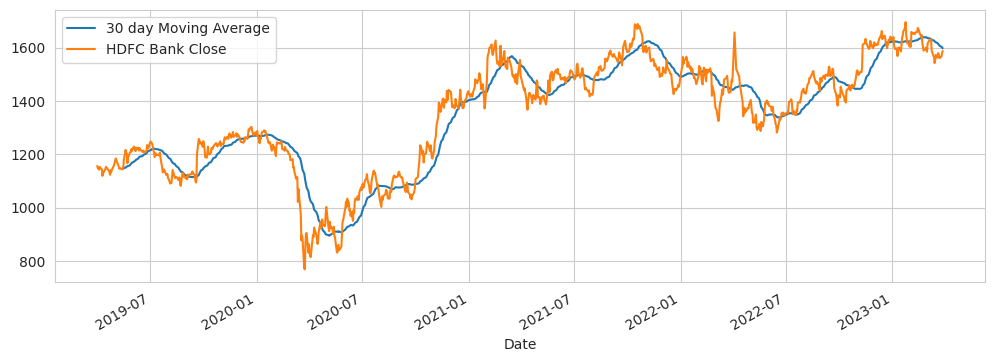

In [ ]:
plt.figure(figsize=(12,4))
df['Close'].rolling(window=30).mean().plot(label='30 day Moving Average')
df['Close'].plot(label="HDFC Bank Close")
plt.legend()

In [ ]:
Moving_Avg = df['Close'].rolling(window=30).mean()
New_df = pd.merge(Moving_Avg, Closed_price,on = 'Date')
New_df.rename(columns = {'Close_x':'Moving 30 Day Avg'}, inplace = True)
New_df.rename(columns = {'Close_y':'Closing Price'}, inplace = True)
New_df.iplot()

<Axes: >

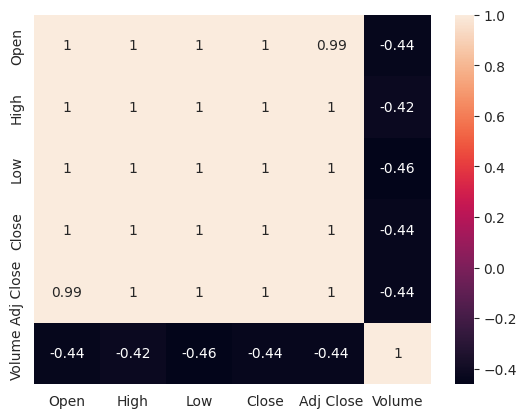

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df["Close"].loc['2019-04-01 00:05:30' : '2023-03-31 00:05:30'].ta_plot(study='sma', periods=[7,21,55])


In [ ]:
df['Close'].loc['2019-04-01 00:05:30' : '2023-03-31 00:05:30'].ta_plot(study='boll')

Feature Engineering

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df['change_percent'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

df['high_low_percent'] = (df['High']-df['Low']) / df['Close'] * 100.0

In [ ]:
df = df[['Close', 'high_low_percent', 'change_percent']]
df['ma_7'] = df['Close'].rolling(window=7).mean()

In [ ]:
df['ma_20'] = df['Close'].rolling(window=20).mean()
df['std_20'] = df['Close'].rolling(window=20).std()
df['upper_band'] = df['ma_20'] + 2 * df['std_20']
df['lower_band'] = df['ma_20'] - 2 * df['std_20']
df = df.drop(['ma_20'], axis =1)

In [ ]:
df['momentum'] = df['Close'].diff(periods=1)

In [ ]:
df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Close,high_low_percent,change_percent,ma_7,std_20,upper_band,lower_band,momentum,log_returns
Date,,,,,,,,,
2019-05-02,1177.900024,1.789197,1.390146,1143.671422,13.386386,1169.887774,1116.342231,19.175049,0.016413
2019-05-03,1183.974976,0.907958,0.158616,1150.760707,16.012136,1176.543023,1112.494477,6.074951,0.005144
2019-05-06,1164.224976,1.496698,-0.832626,1156.699986,16.602407,1178.563561,1112.153932,-19.750000,-0.016822
2019-05-07,1161.175049,1.722393,-1.256423,1159.742850,16.975724,1180.050198,1112.147300,-3.049927,-0.002623
2019-05-08,1153.625000,1.551633,-0.658761,1162.871425,17.026577,1180.734403,1112.628097,-7.550049,-0.006523


<Axes: >

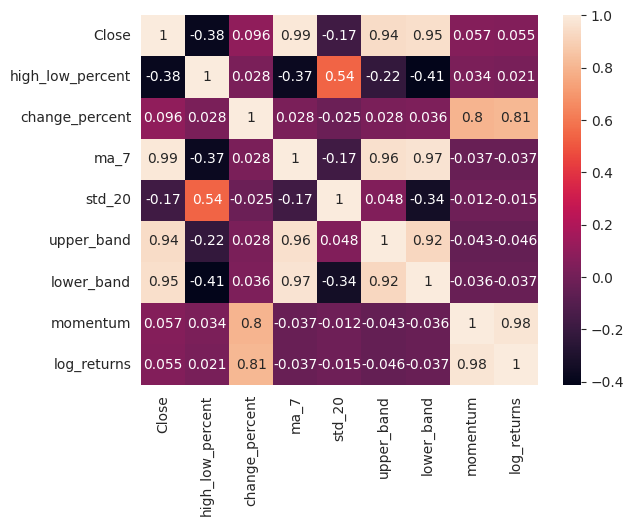

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.columns

Index(['Close', 'high_low_percent', 'change_percent', 'ma_7', 'std_20',
       'upper_band', 'lower_band', 'momentum', 'log_returns'],
      dtype='object')

Model Traning

In [ ]:
df

,Close,high_low_percent,change_percent,ma_7,std_20,upper_band,lower_band,momentum,log_returns
Date,,,,,,,,,
2019-05-02,1177.900024,1.789197,1.390146,1143.671422,13.386386,1169.887774,1116.342231,19.175049,0.016413
2019-05-03,1183.974976,0.907958,0.158616,1150.760707,16.012136,1176.543023,1112.494477,6.074951,0.005144
2019-05-06,1164.224976,1.496698,-0.832626,1156.699986,16.602407,1178.563561,1112.153932,-19.750000,-0.016822
2019-05-07,1161.175049,1.722393,-1.256423,1159.742850,16.975724,1180.050198,1112.147300,-3.049927,-0.002623
2019-05-08,1153.625000,1.551633,-0.658761,1162.871425,17.026577,1180.734403,1112.628097,-7.550049,-0.006523
...,...,...,...,...,...,...,...,...,...
2023-03-23,1563.150024,2.034349,-0.293413,1563.800014,25.723783,1638.437575,1535.542442,-12.650024,-0.008060
2023-03-24,1560.650024,1.214242,0.041668,1566.478585,26.067945,1636.995899,1532.724121,-2.500000,-0.001601
2023-03-27,1567.449951,1.311042,0.336065,1568.700003,26.332376,1636.449763,1531.120257,6.799927,0.004348


In [ ]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df= df_scaled


In [ ]:
X = df.drop(['Close'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
X

,high_low_percent,change_percent,ma_7,std_20,upper_band,lower_band,momentum,log_returns
0,-0.281504,0.921309,-1.027682,-1.098552,-1.261874,-0.771305,0.828550,0.875524
1,-0.867122,0.131723,-0.992777,-0.967582,-1.228338,-0.789588,0.249159,0.262299
2,-0.475882,-0.503804,-0.963533,-0.938140,-1.218156,-0.791206,-0.893026,-0.933045
3,-0.325898,-0.775518,-0.948551,-0.919520,-1.210665,-0.791238,-0.154416,-0.160383
4,-0.439375,-0.392332,-0.933147,-0.916983,-1.207217,-0.788953,-0.353447,-0.372622
...,...,...,...,...,...,...,...,...
967,-0.118591,-0.158092,1.040901,-0.483177,1.099158,1.220597,-0.579009,-0.456250
968,-0.663584,0.056743,1.054090,-0.466010,1.091893,1.207205,-0.130094,-0.104739
969,-0.599257,0.245493,1.065027,-0.452821,1.089141,1.199584,0.281223,0.218953
970,-0.679877,0.623792,1.070338,-0.456729,1.085152,1.197312,0.544383,0.423221


In [ ]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train, y_train)
model_rf = RandomForestRegressor(n_jobs=-1)
model_rf.fit(X_train, y_train)
model_svr = SVR()
model_svr.fit(X_train, y_train)


SVR()

In [ ]:
y_predict_lr = model_lr.predict(X_test)
y_predict_rf = model_rf.predict(X_test)
y_predict_svr = model_svr.predict(X_test)

In [ ]:
print("R2 score for linear regression: ", r2_score(y_test, y_predict_lr))
print("R2 score for random forest: ", r2_score(y_test, y_predict_rf))
print("R2 score for SVR: ", r2_score(y_test, y_predict_svr))

R2 score for linear regression:  0.9896238870151237
R2 score for random forest:  0.9861770673155958
R2 score for SVR:  0.9793275895270694


In [ ]:
model = LinearRegression().fit(X_train, y_train)
y_test_predict = model.predict(X_test)
score = r2_score(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("R2_Score:", score)
print("MSE:", mse)
print("MAE", mae)
print("RMSE", rmse)

R2_Score: 0.9896238870151237
MSE: 0.010739208383851956
MAE 0.07991844506631797
RMSE 0.10363015190499315


In [ ]:
pd.options.display.float_format = '{:.13f}'.format
test_check = pd.DataFrame()
test_check['actual'] = y_test
test_check['prediction'] = y_test_predict
test_check['difference'] = y_test - y_test_predict
test_check.sort_index()

,actual,prediction,difference
5,-1.0181139837584,-0.9341308155051,-0.0839831682533
8,-1.0254462493026,-0.9736815967551,-0.0517646525475
14,-0.7374101791591,-0.8218261280051,0.0844159488460
18,-0.7118695735203,-0.7064696826926,-0.0053998908277
27,-0.6331700426857,-0.5905028858176,-0.0426671568681
...,...,...,...
935,1.4567702849553,1.3014954051980,0.1552748797572
961,0.9198041576056,1.0586098155984,-0.1388056579929
964,1.0168343523008,0.9524658641824,0.0643684881183
967,1.0236779194823,0.9430664501199,0.0806114693624
